<a href="https://colab.research.google.com/github/malhotraarshdeepsingh/sem_ai/blob/main/draft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("customer_segmentation.csv")

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
data.shape

(2240, 29)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [8]:
data.dropna(inplace = True)

In [9]:
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [10]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
data["Education"].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [12]:
data["Marital_Status"].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [13]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst = True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [15]:
data["Age"] = 2025 - data["Year_Birth"]

In [16]:
data["Age"]

,Age
0,68
1,71
2,60
3,41
4,44
...,...
2235,58
2236,79
2237,44
2238,69


In [17]:
data["Total_Children"] = data["Kidhome"] + data["Teenhome"]

In [18]:
data["Total_Children"]

,Total_Children
0,0
1,2
2,0
3,1
4,1
...,...
2235,1
2236,3
2237,0
2238,1


In [19]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [20]:
spend_cols =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [21]:
data["Total_Spending"] = data[spend_cols].sum(axis = 1)

In [22]:
data["Customer_Since"] = (pd.Timestamp("today") - data["Dt_Customer"]).dt.days

In [23]:
data["Customer_Since"]

,Customer_Since
0,4758
1,4208
2,4407
3,4234
4,4256
...,...
2235,4476
2236,4114
2237,4250
2238,4251


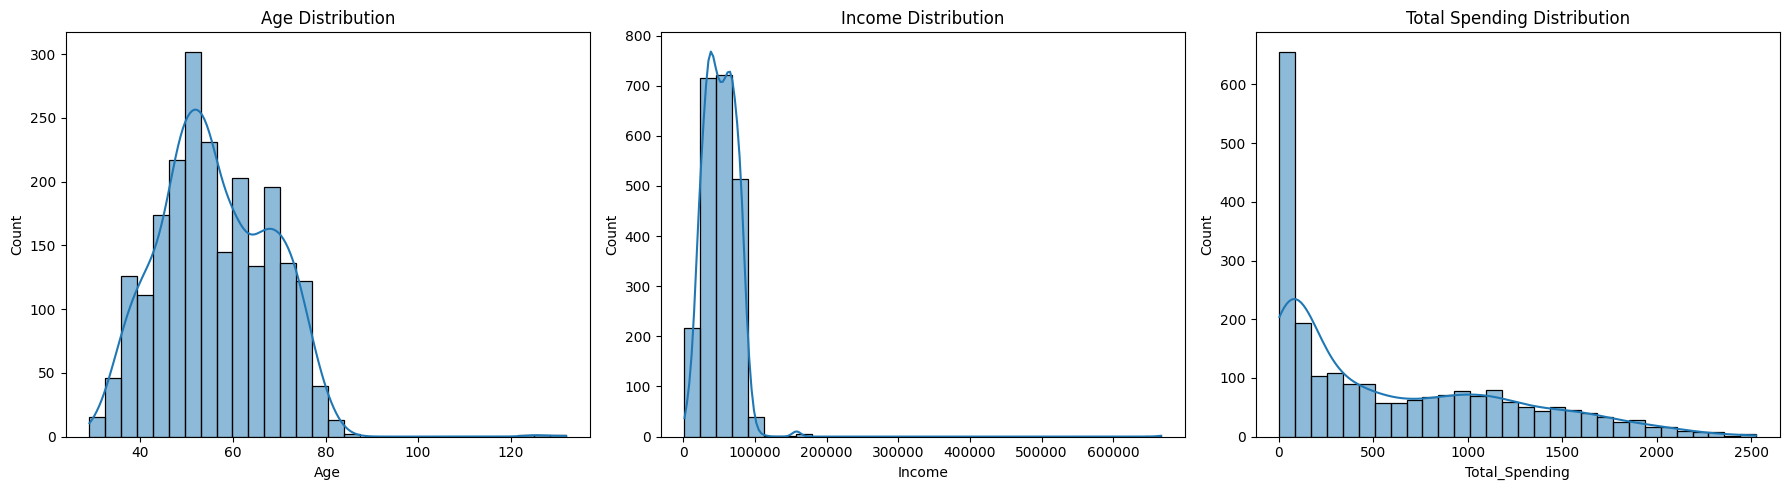

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age Distribution
sns.histplot(data["Age"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

# Income Distribution
sns.histplot(data["Income"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Income Distribution")

# Total Spending Distribution
sns.histplot(data["Total_Spending"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Total Spending Distribution")

plt.tight_layout()
plt.show()

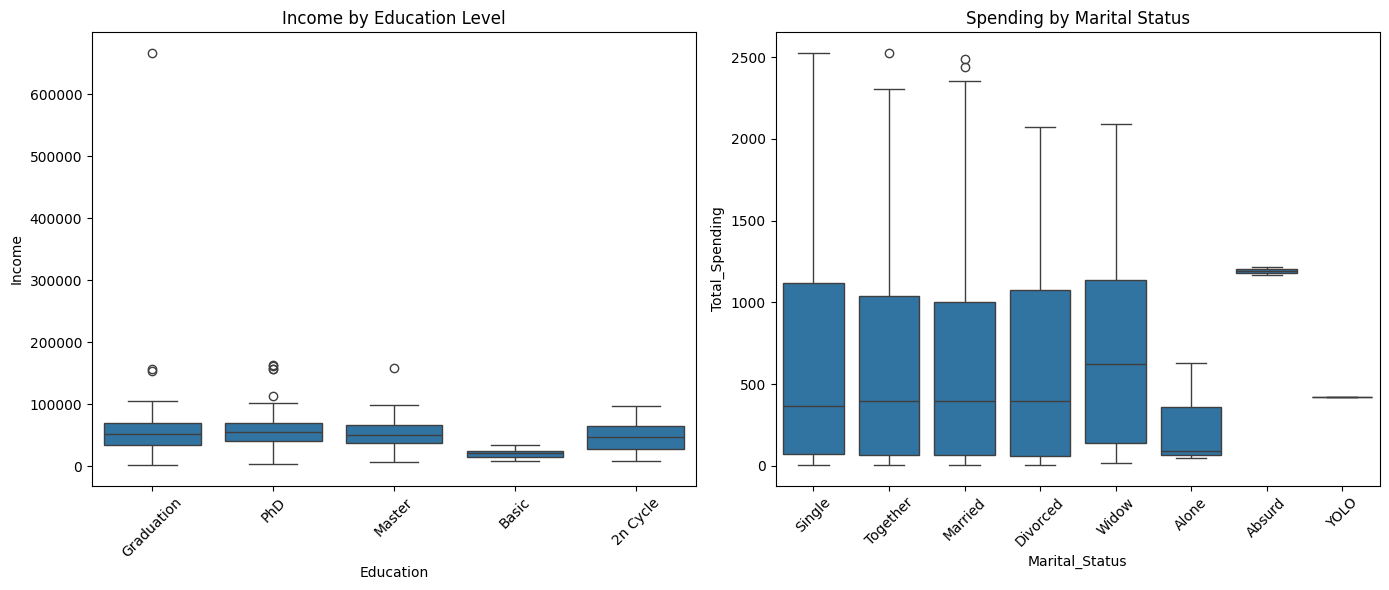

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Income by Education Level (Boxplot)
sns.boxplot(x="Education", y="Income", data=data, ax=axes[0])
axes[0].set_title("Income by Education Level")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Spending by Marital Status (Boxplot)
sns.boxplot(x="Marital_Status", y="Total_Spending", data=data, ax=axes[1])
axes[1].set_title("Spending by Marital Status")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [26]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [27]:
corr = data[["Income", "Age", "Recency", "Total_Spending", "NumWebPurchases", "NumStorePurchases"]].corr()

In [28]:
corr

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


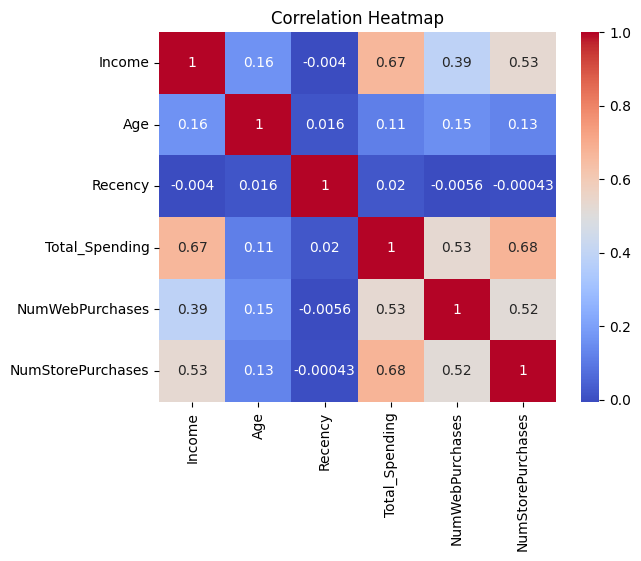

In [29]:
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
pivot_income = data.pivot_table(index = "Education", columns = "Marital_Status", values = "Income", aggfunc = "mean")

In [31]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


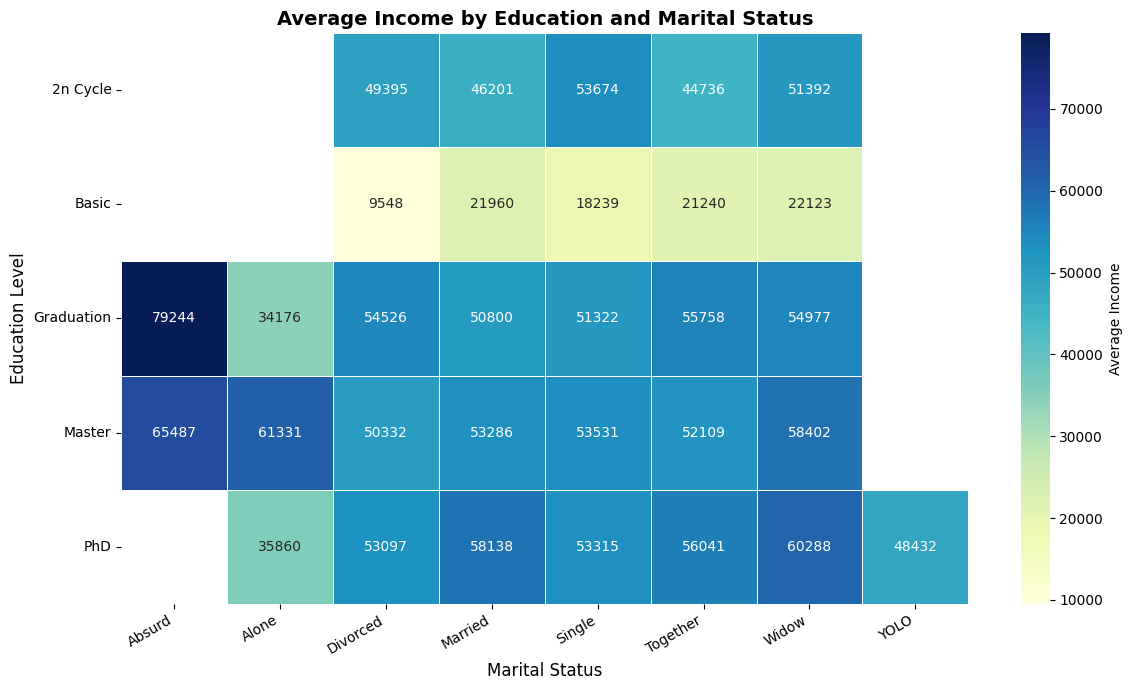

In [32]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    pivot_income,
    annot=True,
    fmt=".0f",   # No scientific notation, round to integer
    cmap="YlGnBu",  # Cleaner colormap (try "mako" or "viridis" too)
    linewidths=0.5,  # Thin lines between cells
    cbar_kws={'label': 'Average Income'}  # Colorbar label
)

plt.title("Average Income by Education and Marital Status", fontsize=14, weight='bold')
plt.xticks(rotation=30, ha="right")  # Rotate x labels for readability
plt.yticks(rotation=0)               # Keep y labels horizontal
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Education Level", fontsize=12)

plt.tight_layout()
plt.show()

In [33]:
group1 = data.groupby("Education")["Total_Spending"].mean().sort_values(ascending = False)

In [34]:
group1

,Total_Spending
Education,
PhD,676.733888
Graduation,621.686380
Master,609.767123
2n Cycle,494.930000
Basic,81.796296


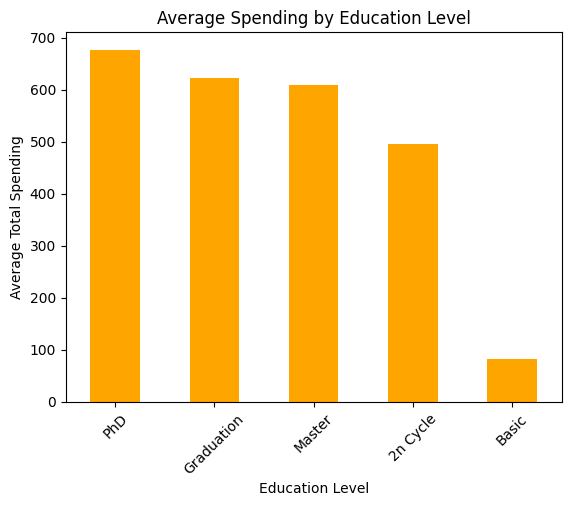

In [35]:
group1.plot(kind = "bar", color = "orange")
plt.title("Average Spending by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Total Spending")
plt.xticks(rotation = 45)
plt.show()

In [36]:
data["AcceptedAny"] = data[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].any(axis = 1).astype(int)

In [37]:
data["AcceptedAny"].unique()

array([1, 0])

In [38]:
data["AcceptedAny"] = data["AcceptedAny"].apply(lambda x: 1 if x > 0 else 0)

In [39]:
data['AcceptedAny'].unique()

array([1, 0])

In [40]:
group2 = data.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending = False)

In [41]:
group2

,AcceptedAny
Marital_Status,
Absurd,0.500000
YOLO,0.500000
Widow,0.342105
Alone,0.333333
Single,0.312102
Divorced,0.297414
Married,0.252042
Together,0.251309


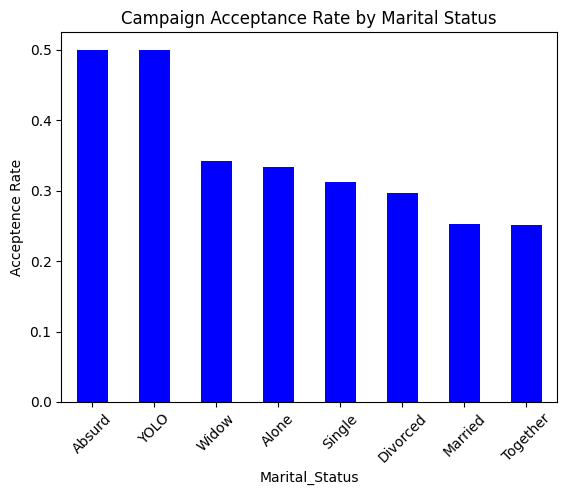

In [42]:
group2.plot(kind = "bar", color = "blue")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptence Rate")
plt.xticks(rotation = 45)
plt.show()

In [43]:
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]

In [44]:
data["AgeGroup"] = pd.cut(data["Age"], bins = bins, labels = labels)

In [45]:
data['AgeGroup']

,AgeGroup
0,60-69
1,70+
2,50-59
3,40-49
4,40-49
...,...
2235,50-59
2236,70+
2237,40-49
2238,60-69


In [46]:
group3 = data.groupby("AgeGroup")["Income"].mean()

/tmp/ipython-input-588528920.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = data.groupby("AgeGroup")["Income"].mean()


In [47]:
group3

,Income
AgeGroup,
18-29,46658.000000
30-39,46283.028302
40-49,49224.877034
50-59,50812.913303
60-69,56200.827887
70+,58944.316294


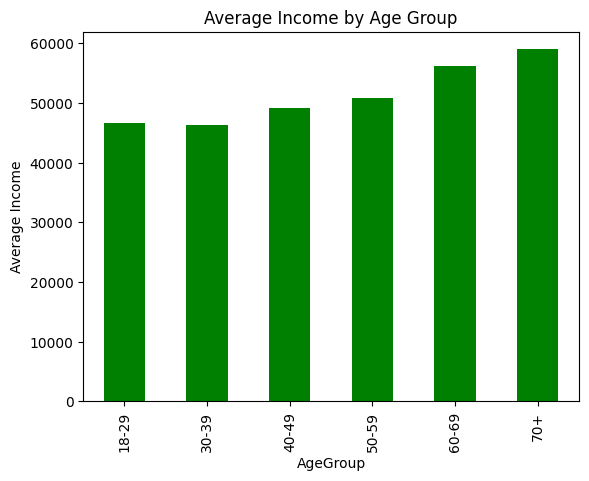

In [48]:
group3.plot(kind = "bar", color = "green")
plt.title("Average Income by Age Group")
plt.ylabel("Average Income")
plt.show()

In [49]:
features = ["Age", "Income", "Total_Spending", "NumWebPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Recency"]

In [50]:
x = data[features].copy()

In [51]:
x

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
x_scaled = scaler.fit_transform(x)

In [54]:
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

In [55]:
from sklearn.cluster import KMeans

In [56]:
wcss = []

In [57]:
for i in range(2, 10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

In [58]:
wcss

[10218.620143748776,
 9647.452377368278,
 8395.73676431843,
 7577.831502841838,
 7133.563660217788,
 6787.202652197814,
 6297.275302952628,
 5876.488347126572]

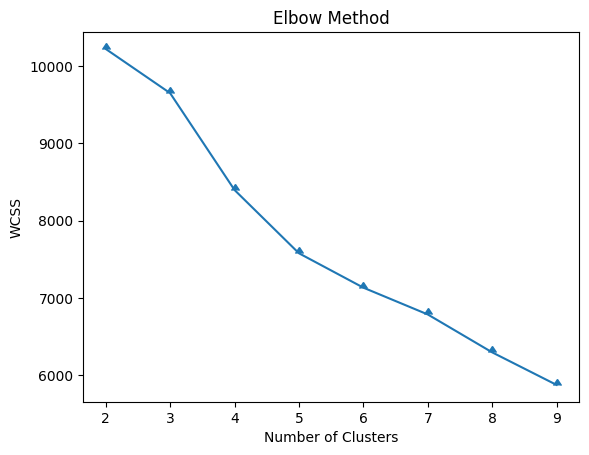

In [59]:
plt.plot(range(2, 10), wcss, marker=10)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [60]:
kmeans = KMeans(n_clusters = 6)
data["Cluster"] = kmeans.fit_predict(x_scaled)

In [61]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4758,1,60-69,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4208,0,70+,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4407,0,50-59,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4234,0,40-49,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4256,0,40-49,5


In [62]:
cluster_summary = data.groupby("Cluster")[features].mean()

In [63]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,52.183888,34310.182137,115.383538,2.203152,3.292469,6.574431,24.922942
1,65.073770,67671.098361,1037.102459,5.598361,10.700820,4.135246,31.196721
2,59.408571,58224.942857,835.205714,8.142857,7.034286,6.571429,50.120000
3,67.780083,78860.033195,1166.817427,3.892116,6.556017,2.195021,59.688797
4,44.734982,75029.946996,1357.141343,4.883392,8.833922,2.851590,53.102473
5,55.087287,36166.174573,130.447818,2.388994,3.457306,6.428843,75.548387


In [64]:
data["Cluster"].value_counts()

,count
Cluster,
0,571
5,527
2,350
4,283
1,244
3,241


In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data =pca.fit_transform(x_scaled)
data["PCA1"], data["PCA2"] = pca_data[:, 0], pca_data[:, 1]

In [66]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]])

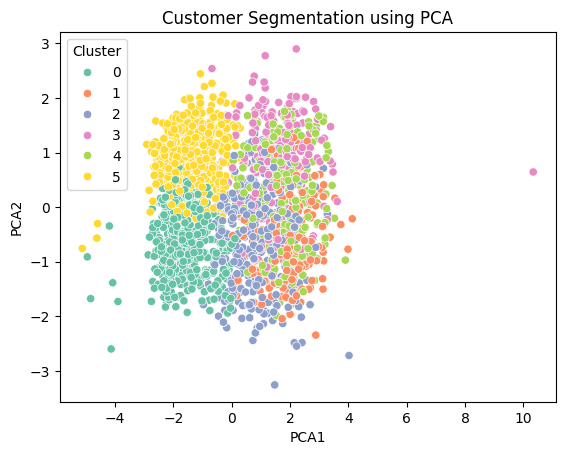

In [67]:
sns.scatterplot(x = "PCA1", y = "PCA2", hue = "Cluster", data = data, palette="Set2")
plt.title("Customer Segmentation using PCA")
plt.show()

# Cluster 0 High Income High Spending
# Cluster 2 High Web Purchases Low Store Purchases
# Cluster 5 Low Recency Inactive
# Cluster 6 Low Income Low Spending

In [68]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [69]:
# Write the Streamlit code to a file
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
import pandas as pd
import joblib

# Load the scaler and kmeans model
scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans_model.pkl")

st.title("Customer Segmentation App")
st.write("Enter customer details to predict the segment")

age = st.number_input("Age", min_value=18, max_value=100, value=30)
income = st.number_input("Income", min_value=0, value=50000)
total_spending = st.number_input("Total Spending", min_value=0, value=1000)
num_web_purchases = st.number_input("Number of Web Purchases", min_value=0, value=5)
num_store_purchases = st.number_input("Number of Store Purchases", min_value=0, value=3)
num_web_visits = st.number_input("Number of Web Visits", min_value=0, value=10)
recency = st.number_input("Recency", min_value=0, value=30)

input_data = pd.DataFrame({
    "Age": [age],
    "Income": [income],
    "Total_Spending": [total_spending],
    "NumWebPurchases": [num_web_purchases],
    "NumStorePurchases": [num_store_purchases],
    "NumWebVisitsMonth": [num_web_visits],
    "Recency": [recency]
})

input_scaled = scaler.transform(input_data)

if st.button("Predict"):
    cluster = kmeans.predict(input_scaled)
    st.write(f"The predicted cluster is: {cluster[0]}")
""")